### Packages

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from Optimization import *
from opt_utils_v1a import predict

### Dataset

#### Use the a model and datasets (a complex classification problem that you can choose on your own) and test different regularization techniques:

Here we will be using the same dataset as the assignment 2 in which the problem is to classify a set of images as cats or not. 
Although it is not a requirement from this assignment, we will first try to solve this problem without regularization whatsoever.

To follow the same idea from the assignment 2, for the training of the model we will be using the given dataset by the teacher as a file named train_catvnoncat.h5. While the first 100 images from the sets of cats and dogs labeled as "train" retrieved from https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?select=train will be used for our testing. And the next 100 images from those that same sets will be used for our tuning set. We will first process them to reduce their pixel resolution to the same as the ones we used in the training (64 pixels x 64 pixels) and then represent them as arrays.
##### 0.  Preprocess datasets

In [2]:
# Some useful functions and packages for processing and loading the datasets:


def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

def preprocess_dataset(dataset):
    dataset_flatten = dataset.reshape(dataset.shape[0],-1).T
    return dataset_flatten/255 

train_set_x = preprocess_dataset(train_set_x_orig) 
test_set_x = preprocess_dataset(test_set_x_orig)

## Extract our own images from cats and dogs
import os

def process_images(directory, target_size=(64, 64), image_range=range(0,100)):
    image_list = []

    filenames = sorted(os.listdir(directory))[min(image_range):max(image_range)+1]
    
    for filename in filenames:
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            
            img = Image.open(file_path)
            img_resized = img.resize(target_size)
            img_array = np.array(img_resized)
            
            image_list.append(img_array)
    
    return np.array(image_list)

test_cat_images = process_images("datasets/train/cats")
test_dog_images = process_images("datasets/train/dogs")
tuning_cat_images = process_images("datasets/train/cats",image_range=(101,200))
tuning_dog_images = process_images("datasets/train/dogs",image_range=(101,200))

def join_cats_and_dogs(cat_images,dog_images):
    cat_set_X = preprocess_dataset(cat_images)
    dog_set_X = preprocess_dataset(dog_images)
    m_cat_set = cat_set_X.shape[1]
    cat_set_Y = np.ones((1, m_cat_set))
    m_dog_set = dog_set_X.shape[1]
    dog_set_Y = np.zeros((1, m_dog_set))

    set_X = np.concatenate((cat_set_X, dog_set_X), axis=1)
    set_Y = np.concatenate((cat_set_Y, dog_set_Y), axis=1)

    np.random.seed(1)
    shuffle_indices = np.random.permutation(set_X.shape[1])
    final_set_X = set_X[:, shuffle_indices]
    final_set_Y = set_Y[:, shuffle_indices]

    return final_set_X,final_set_Y

final_test_X, final_test_Y = join_cats_and_dogs(test_cat_images,test_dog_images)
final_tuning_X, final_tuning_Y = join_cats_and_dogs(tuning_cat_images,tuning_dog_images)

#### a) Use the a model (shallow fully connected network) and datasets (a complex classification problem that you can choose on your own) and test the following optimizers in the best configuration that you have obtained from Assignement 4.

We will use the same architecture for this network as the one from the last assignments given by the next formula 

In [3]:
# layers_dims = [X.shape[0], 20, 3, 1]

layers_dims = [train_set_x.shape[0], 20, 3, 1]

#### Show the effects of the optimizer on the final accuracy and validation loss (plot the training and validation loss)


### 1.Gradient Descent

Cost after epoch 0: 0.739005
Cost after epoch 5000: 0.006015
Cost after epoch 10000: 0.004359
Cost after epoch 15000: 0.003363


c:\Users\13042\Desktop\Maestria\Semestre 3\Neural Systems\Assignment5-OptmizationLearningRateSchedulers\opt_utils_v1a.py:100: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\13042\Desktop\Maestria\Semestre 3\Neural Systems\Assignment5-OptmizationLearningRateSchedulers\opt_utils_v1a.py:100: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


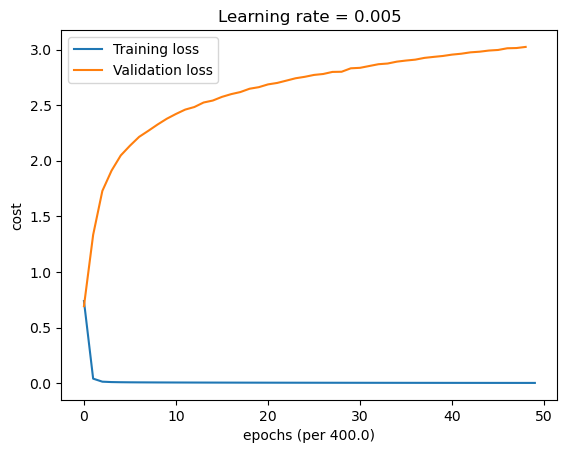

In [4]:
parameters_gd = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "gd", learning_rate = 0.005)

In [5]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_gd)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_gd)

Training
Accuracy: 1.0
Testing
Accuracy: 0.59


### 2. Momentum

Cost after epoch 0: 0.793680
Cost after epoch 5000: 0.012350
Cost after epoch 10000: 0.005873
Cost after epoch 15000: 0.003806


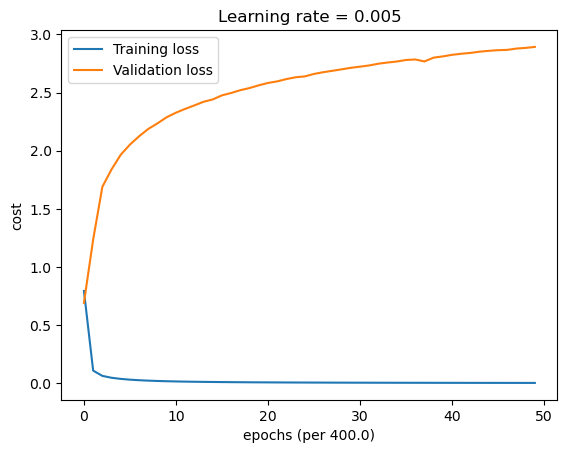

In [6]:
parameters_m = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "momentum", learning_rate = 0.005)

In [7]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_m)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_m)

Training
Accuracy: 1.0
Testing
Accuracy: 0.645


### 3. Adam
 

Cost after epoch 0: 0.741379
Cost after epoch 5000: 0.644051
Cost after epoch 10000: 0.643981
Cost after epoch 15000: 0.643954


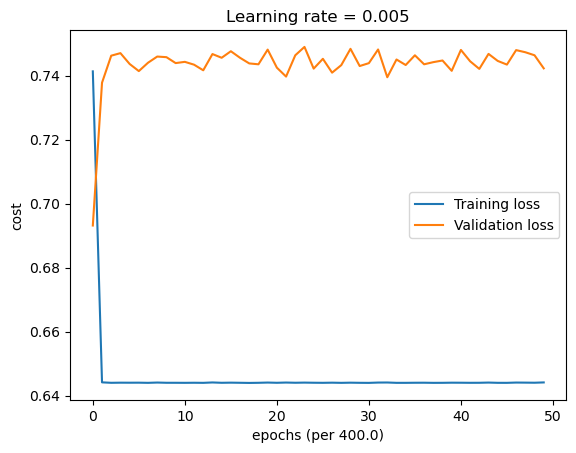

In [8]:
parameters_a = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "adam", learning_rate = 0.005)

In [9]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_a)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_a)

Training
Accuracy: 0.6555023923444976
Testing
Accuracy: 0.5


## b) Test the three models using the two basic learning rate schedulers
 
## 1. Expontenial LR Decay (provided in the notebook)


### 1.Gradient Descent

Cost after epoch 0: 0.739005
learning rate after epoch 0: 0.005000


Cost after epoch 5000: 0.687636
learning rate after epoch 5000: 0.000001
Cost after epoch 10000: 0.687261
learning rate after epoch 10000: 0.000000
Cost after epoch 15000: 0.687044
learning rate after epoch 15000: 0.000000


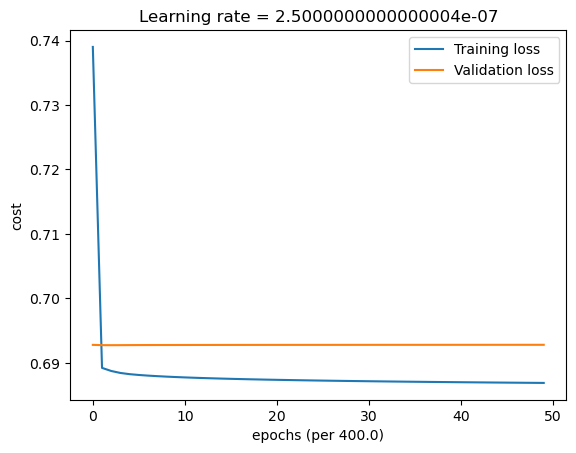

In [10]:
parameters_gd_lr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "gd", learning_rate = 0.005, decay=update_lr)

In [11]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_gd_lr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_gd_lr)

Training
Accuracy: 0.6602870813397129
Testing
Accuracy: 0.505


### 2. Momentum

Cost after epoch 0: 0.793680
learning rate after epoch 0: 0.005000


Cost after epoch 5000: 0.655799
learning rate after epoch 5000: 0.000001
Cost after epoch 10000: 0.652941
learning rate after epoch 10000: 0.000000
Cost after epoch 15000: 0.651386
learning rate after epoch 15000: 0.000000


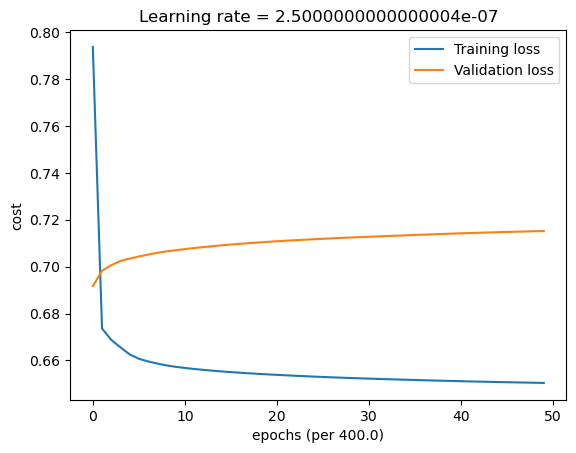

In [12]:
parameters_m_lr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "momentum", learning_rate = 0.005,decay=update_lr)

In [13]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_m_lr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_m_lr)

Training
Accuracy: 0.6650717703349283
Testing
Accuracy: 0.5


### 3. Adam
 

Cost after epoch 0: 0.741379
learning rate after epoch 0: 0.005000
Cost after epoch 5000: 0.670229
learning rate after epoch 5000: 0.000001
Cost after epoch 10000: 0.668917
learning rate after epoch 10000: 0.000000
Cost after epoch 15000: 0.668173
learning rate after epoch 15000: 0.000000


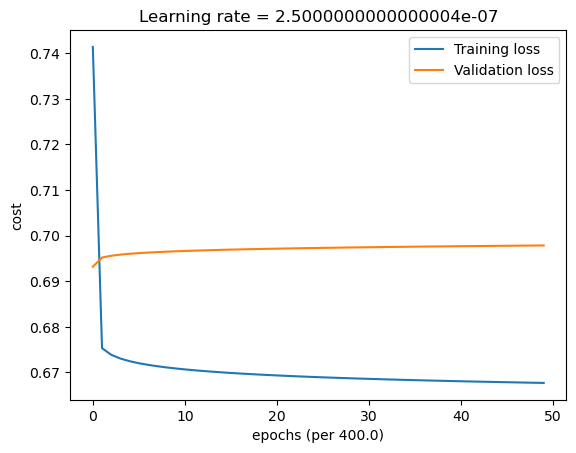

In [14]:
parameters_a_lr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "adam", learning_rate = 0.005,decay=update_lr)

In [15]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_a_lr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_a_lr)

Training
Accuracy: 0.6555023923444976
Testing
Accuracy: 0.5


 
## 2. Step LR Decay

### 1.Gradient Descent

Cost after epoch 0: 0.739005
learning rate after epoch 0: 0.005000


Cost after epoch 5000: 0.007876
learning rate after epoch 5000: 0.000833
Cost after epoch 10000: 0.007243
learning rate after epoch 10000: 0.000455
Cost after epoch 15000: 0.006949
learning rate after epoch 15000: 0.000313


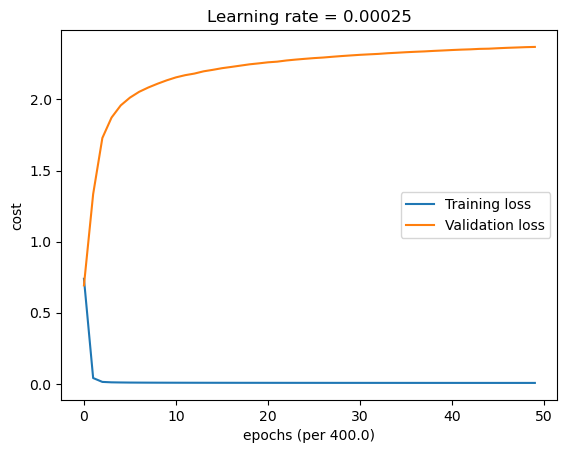

In [16]:
parameters_gd_slr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "gd", learning_rate = 0.005,decay=schedule_lr_decay)

In [17]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_gd_slr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_gd_slr)

Training
Accuracy: 1.0
Testing
Accuracy: 0.6


### 2. Momentum

Cost after epoch 0: 0.793680
learning rate after epoch 0: 0.005000
Cost after epoch 5000: 0.027312
learning rate after epoch 5000: 0.000833
Cost after epoch 10000: 0.021452
learning rate after epoch 10000: 0.000455
Cost after epoch 15000: 0.018918
learning rate after epoch 15000: 0.000313


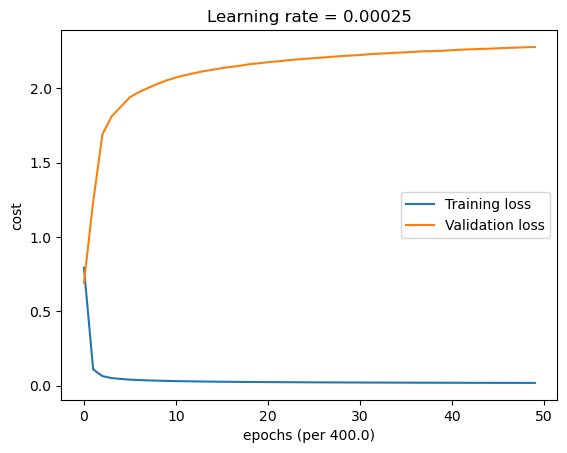

In [18]:
parameters_m_slr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "momentum", learning_rate = 0.005,decay=schedule_lr_decay)

In [19]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_m_slr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_m_slr)

Training
Accuracy: 1.0
Testing
Accuracy: 0.635


### 3. Adam
 

Cost after epoch 0: 0.741379
learning rate after epoch 0: 0.005000
Cost after epoch 5000: 0.643974
learning rate after epoch 5000: 0.000833
Cost after epoch 10000: 0.643975
learning rate after epoch 10000: 0.000455
Cost after epoch 15000: 0.643978
learning rate after epoch 15000: 0.000313


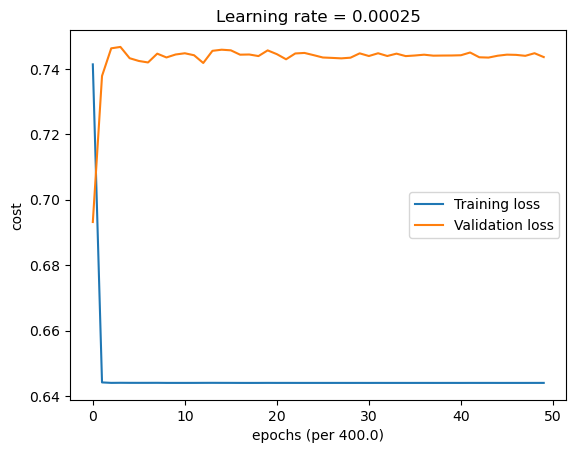

In [20]:
parameters_a_slr = model(train_set_x, train_set_y, final_tuning_X, final_tuning_Y, layers_dims, "adam", learning_rate = 0.005,decay=schedule_lr_decay)

In [21]:
print("Training")
predictions = predict(train_set_x, train_set_y, parameters_a_slr)
print("Testing")
predictions = predict(final_test_X, final_test_Y, parameters_a_slr)

Training
Accuracy: 0.6555023923444976
Testing
Accuracy: 0.5


### Summary

We did not perform any tuning, so these results could be further improve by tuning the hyperparameters of the models and using regularization (as the model is overfitting). However, overfitting didnt improve much this model the last time that it was used. We consider it could be a better idea to change the architecture of the neural network by modifying the size and the amount of layers and the activation functions (which currently is LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID).

| Model | Training Accuracy | Testing Accuracy |
|-----------|-----------|-----------|
| Grad. Descent  | 100%  | 59%  |
| Momentum  | 100%  | 64.5%  |
| Adam  | 65.5%  | 50%  |
| Grad. Descent  + Exp Learning Decay| 66%  | 50.5%  |
| Momentum  + Exp Learning Decay | 66.5%  | 50%  |
| Adam + Exp Learning Decay | 65.5%  | 50%  |
| Grad. Descent  + Step Learning Decay| 100%  | 60%  |
| Momentum  + Step Learning Decay | 100%  | 63.5%  |
| Adam + Step Learning Decay | 65.5%  | 50%  |